# Zastosowanie drzew decyzyjnych oraz lasów losowych przy, gdzie y reprezentowany jest przez dane typu ciągłego**


## 1. Biblioteki

In [1]:
import pandas as pd
import sklearn.tree
import numpy as np
from sklearn.tree import DecisionTreeRegressor  #ładowanie fukcji do tworzenia instacji drzew dla Y ciaglego
from sklearn.metrics import mean_absolute_error, r2_score #funkcje do badania dopasowania modelu
from sklearn.ensemble import RandomForestRegressor #ladowanie funkcji RandomForestRegressor do tworzenia instancji algorytmu
from sklearn.ensemble import GradientBoostingRegressor 
import dtreeviz.trees as dtv # importowanie dtreeviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from dtreeviz.trees import *


import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 

from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer

import graphviz

## 2. Wczytuje  i sprawdzam typ danych

In [2]:
train_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv')
test_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv')
val_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv')

train_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
test_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
val_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']

caly_df = pd.concat([train_df, test_df, val_df])
caly_df['Województwo']=caly_df['Województwo'].astype('category')
caly_df['Data urodzenia']=caly_df['Data urodzenia'].astype('category')

del caly_df["id"]
del caly_df["PF"]
del caly_df["IE"]
del caly_df["Dokł. IE"]
del caly_df['kategoria']

In [3]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Województwo     1881 non-null   category
 1   Data urodzenia  1881 non-null   category
 2   PI-PROD         1881 non-null   int64   
 3   PI-POKR         1881 non-null   int64   
 4   Prc             1881 non-null   int64   
 5   Psm             1881 non-null   int64   
 6   Pnr             1881 non-null   int64   
 7   Pw              1881 non-null   int64   
 8   PI-PLOD         1881 non-null   int64   
 9   CRj             1881 non-null   int64   
 10  CRk             1881 non-null   int64   
 11  PP              1881 non-null   int64   
 12  OMC             1881 non-null   int64   
 13  WH-KSOM         1881 non-null   int64   
 14  WH-DLUG         1881 non-null   int64   
 15  IP              1881 non-null   int64   
 16  kg ml           1881 non-null   int64   
 17  kg tł          

### 3. Usuwam mniejszości zmiennych kategorycznych 

In [4]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                4
PODKARPACKIE             1
Name: Województwo, dtype: int64

In [5]:
caly_df=caly_df[caly_df['Województwo']!='PODKARPACKIE']
caly_df=caly_df[caly_df['Województwo']!='LUBELSKIE']

In [6]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                0
PODKARPACKIE             0
Name: Województwo, dtype: int64

In [7]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       1
Name: Data urodzenia, dtype: int64

In [8]:
caly_df=caly_df[caly_df['Data urodzenia']!=2015]

In [9]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       0
Name: Data urodzenia, dtype: int64

In [10]:
caly_label=caly_df["OMC"]
del caly_df["OMC"]

### 4. Zakodowuje zmienne kategoryczne 

In [11]:
a=pd.get_dummies(caly_df['Województwo'])
b=pd.get_dummies(caly_df['Data urodzenia'])
caly_df= pd.concat([caly_df,a,b], axis=1)
del caly_df['Województwo']
del caly_df['Data urodzenia']

In [12]:
caly_df

,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,CRk,PP,...,ŁÓDZKIE,ŚLĄSKIE,ŚWIĘTOKRZYSKIE,2015,2016,2017,2018,2019,2020,2021
0,137,127,121,113,106,128,109,107,110,101,...,0,0,0,0,0,0,0,0,1,0
1,126,123,109,113,103,128,114,114,113,94,...,0,0,0,0,0,0,1,0,0,0
2,126,120,110,107,102,124,113,112,117,94,...,0,0,0,0,0,0,0,0,1,0
3,133,111,104,110,99,114,114,113,126,89,...,0,0,0,0,0,0,0,0,1,0
4,125,115,91,95,101,124,134,129,133,102,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,134,119,112,115,106,118,102,103,108,92,...,0,0,0,0,0,0,0,0,1,0
185,132,117,103,103,107,119,93,94,102,96,...,0,0,0,0,0,0,1,0,0,0
186,120,109,106,97,96,115,120,114,134,100,...,0,0,0,0,0,0,0,1,0,0
187,113,114,97,94,103,120,114,104,115,132,...,1,0,0,0,0,0,1,0,0,0


In [13]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875 entries, 0 to 188
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PI-PROD              1875 non-null   int64  
 1   PI-POKR              1875 non-null   int64  
 2   Prc                  1875 non-null   int64  
 3   Psm                  1875 non-null   int64  
 4   Pnr                  1875 non-null   int64  
 5   Pw                   1875 non-null   int64  
 6   PI-PLOD              1875 non-null   int64  
 7   CRj                  1875 non-null   int64  
 8   CRk                  1875 non-null   int64  
 9   PP                   1875 non-null   int64  
 10  WH-KSOM              1875 non-null   int64  
 11  WH-DLUG              1875 non-null   int64  
 12  IP                   1875 non-null   int64  
 13  kg ml                1875 non-null   int64  
 14  kg tł                1875 non-null   int64  
 15  % tł                 1875 non-null   in

### 5. Tworzę metrykę do oceny dobierania parametrów


In [14]:
mae_scorer = make_scorer(mean_absolute_error)

## 6 Modele

gradient boosting i XGBR nie wymagają standaryzacji

In [15]:
caly_df_zapas=caly_df

# 9. XGBR-Regressor

## 9.1 XGBR-Regressor dobieram zmienne

In [16]:
estimator=xgb.XGBRegressor()
selector = RFECV(estimator, step=1, cv=2,scoring=mae_scorer)
selector2 = selector.fit(caly_df, caly_label)                   

In [17]:
kombinacje=[]
nazwy_kolumn=caly_df.columns
dictionary = dict(zip(nazwy_kolumn, selector2.ranking_))
dictionary= dict(sorted(dictionary.items(), key=lambda item: item[1]))
for x in dictionary.keys():
    print(x)

PP
CRk
ŚLĄSKIE
kg ml
ŁÓDZKIE
ZACHODNIOPOMORSKIE
w
kg bi
WARMIŃSKO-MAZURSKIE
% bi
og
rc
nr
2018
kg tł
sm
IP
WIELKOPOLSKIE
% tł
WH-DLUG
KUJAWSKO-POMORSKIE
WH-KSOM
MAZOWIECKIE
PODLASKIE
CRj
2021
PI-PLOD
ŚWIĘTOKRZYSKIE
OPOLSKIE
2019
Pw
Pnr
2020
LUBUSKIE
POMORSKIE
2017
Psm
Prc
2016
PI-POKR
DOLNOŚLĄSKIE
PI-PROD
MAŁOPOLSKIE
PODKARPACKIE
2015
LUBELSKIE


In [18]:
nazwy_kolumn_2=[]
for x in dictionary.keys():
    nazwy_kolumn_2.append(x)

In [19]:
dane_do_porownania=pd.DataFrame(columns=["Liczba zmiennych",
                                    "Błąd"])
glowne_wyniki=[]
glowne_zmienne=[]
for i in range(0,len(nazwy_kolumn_2)):
    zmienne=[]
    for q in range(0,i+1):
        zmienne.append(nazwy_kolumn_2[q])
    kombinacje.append(zmienne)
    data_frame=caly_df_zapas[zmienne]
    kfold = KFold(n_splits=5, shuffle=False)

    data_frame = np.array(data_frame)
    caly_label = np.array(caly_label)
    
    wyniki=[]
    
    for train, test in kfold.split(data_frame, caly_label):
        reg = xgb.XGBRegressor()
        reg.fit(data_frame[train], caly_label[train])
        predykcje=reg.predict(data_frame[test])
        
        dane_folda=pd.DataFrame({"pred": predykcje.ravel(),
                                    "obs": caly_label[test]
                                })
        
        dane_folda['blad']=abs(dane_folda['obs']-dane_folda['pred'])
        mae=dane_folda['blad'].sum()/len(dane_folda['blad'])
        wyniki.append(mae)
        
    wynik=sum(wyniki)/len(wyniki)
    glowne_wyniki.append(wynik)
    glowne_zmienne.append(i)
    
dane_do_porownania["Liczba zmiennych"]=glowne_zmienne
dane_do_porownania["Błąd"]=glowne_wyniki    




In [20]:
index=list(dane_do_porownania["Błąd"]).index(min(list(dane_do_porownania["Błąd"])))

print(index,"\n",kombinacje[index])

40 
 ['PP', 'CRk', 'ŚLĄSKIE', 'kg ml', 'ŁÓDZKIE', 'ZACHODNIOPOMORSKIE', 'w', 'kg bi', 'WARMIŃSKO-MAZURSKIE', '% bi', 'og', 'rc', 'nr', 2018, 'kg tł', 'sm', 'IP', 'WIELKOPOLSKIE', '% tł', 'WH-DLUG', 'KUJAWSKO-POMORSKIE', 'WH-KSOM', 'MAZOWIECKIE', 'PODLASKIE', 'CRj', 2021, 'PI-PLOD', 'ŚWIĘTOKRZYSKIE', 'OPOLSKIE', 2019, 'Pw', 'Pnr', 2020, 'LUBUSKIE', 'POMORSKIE', 2017, 'Psm', 'Prc', 2016, 'PI-POKR', 'DOLNOŚLĄSKIE']


In [21]:
print(len(kombinacje[index]))

41


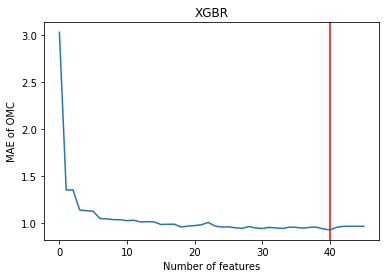

In [22]:
plt.plot(list(dane_do_porownania["Błąd"]))
plt.axvline(x=list(dane_do_porownania["Błąd"]).index(min(list(dane_do_porownania["Błąd"]))), color='r', linestyle='-')
plt.xlabel("Number of features")
plt.ylabel("MAE of OMC")
plt.title("XGBR")
plt.show()

In [24]:
zestaw_caly=caly_df_zapas
zestaw_41=caly_df_zapas[kombinacje[index]]

zestaw_caly = np.array(zestaw_caly)
zestaw_41 = np.array(zestaw_41)

caly_label = np.array(caly_label)

In [23]:
dane_do_porownania.to_csv('Wyniki REFCV XGBR OMC.csv',index=False)

## 9.2 XGBR - hiperparametry

### 9.2.1 XGBR - hiperparametry Wszystkie part1

In [25]:
param_grid = {
    'min_child_weight':range(0, 3,1), #
    'max_delta_step':[0,1,2],
    'subsample':[0.5,0.7,1],
    'colsample_bytree':[0.5,0.7,1],
    'n_estimators':[10,100,500]
}

In [26]:
XGB_1 = xgb.XGBRegressor()
grid_search_2 = GridSearchCV(estimator = XGB_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 2 folds for each of 243 candidates, totalling 486 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [27]:
grid_search_2.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
grid_search_2.best_score_

-1.2024443229227046

## 9.3 XGBR - hiperparametry zestaw 41

### 9.3.1 XGBR - hiperparametry zestaw 41 part1

In [29]:
param_grid = {
    'min_child_weight':range(0, 3,1), #
    'max_delta_step':[0,1,2],
    'subsample':[0.5,0.7,1],
    'colsample_bytree':[0.5,0.7,1],
    'n_estimators':[10,100,500]
}

In [30]:
XGB_1 = xgb.XGBRegressor()
grid_search_2 = GridSearchCV(estimator = XGB_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_2.fit(zestaw_41, np.ravel(caly_label))

Fitting 2 folds for each of 243 candidates, totalling 486 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [31]:
grid_search_2.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
grid_search_2.best_score_

-1.189274178499447

### 8.4 Cross validacje

### 8.4.1 całe dane

In [34]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_1=pd.DataFrame()
licznik=1
wart_1=[]

for train, test in kfold.split(zestaw_caly, caly_label):
    GB_1 = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=2, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
    
    GB_1.fit(zestaw_caly[train], caly_label[train])
    predykcje=GB_1.predict(zestaw_caly[test])
    dane_folda_1=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_1=pd.concat([dane_do_zapisu_1,dane_folda_1])
    sredni_blad=mean_absolute_error(caly_label[test],predykcje)
    wart_1.append(sredni_blad)
    licznik+=1

In [35]:
wart_1

[0.9808013712565105,
 0.9808893025716146,
 0.8381019897460937,
 0.9278861694335937,
 0.7846448771158854]

In [36]:
sum(wart_1)/len(wart_1)

0.9024647420247396

### 8.4.2 zestaw 41

In [37]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]

for train, test in kfold.split(zestaw_41, caly_label):
    GB_2 = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=2, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
    
    GB_2.fit(zestaw_41[train], caly_label[train])
    predykcje=GB_2.predict(zestaw_41[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    sredni_blad=mean_absolute_error(caly_label[test],predykcje)
    wart_2.append(sredni_blad)
    licznik+=1

In [38]:
wart_2

[0.9817881062825521,
 0.9593976643880209,
 0.8033081461588542,
 0.9371940104166666,
 0.7834280598958333]

In [39]:
sum(wart_2)/len(wart_2)

0.8930231974283854

## 8.3 Zapisuje predykcje XGBR zestaw 15

In [40]:
dane_do_zapisu_2.to_csv("D:/STUDIA/ROK_II/Projekt/Predykcje_i błędy/Okres Między Ciążowy/OMC_XGB_FS.csv")